# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [1]:
def celsius_a_fahrenheit(c):
    return (c * 9/5) + 32

Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [2]:
celsius = list(range(0, 101, 10))
fahrenheit = [celsius_a_fahrenheit(c) for c in celsius]

Importa Pandas

In [3]:
import pandas as pd


Creamos un DataFrame con las listas

In [4]:
df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})
print(df)

    Celsius  Fahrenheit
0         0        32.0
1        10        50.0
2        20        68.0
3        30        86.0
4        40       104.0
5        50       122.0
6        60       140.0
7        70       158.0
8        80       176.0
9        90       194.0
10      100       212.0


Arma una gráfica que muestre esta relación

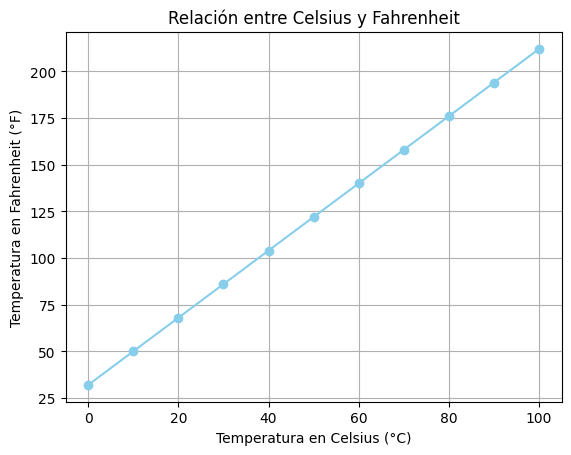

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', color='skyblue')

plt.title('Relación entre Celsius y Fahrenheit')
plt.xlabel('Temperatura en Celsius (°C)')
plt.ylabel('Temperatura en Fahrenheit (°F)')

plt.grid(True)

plt.show()



Ponle etiquetas

y = mx + b

y = 1.80x + 32.00


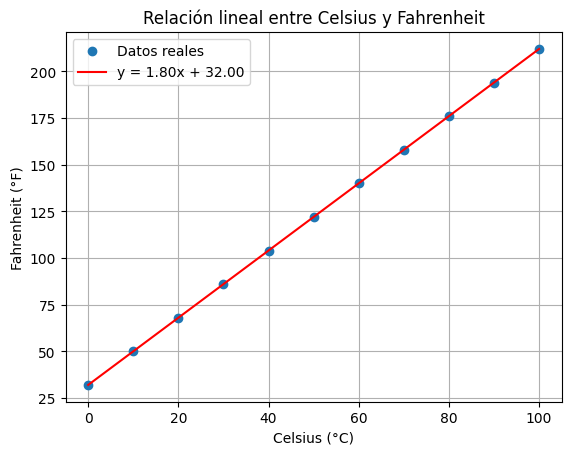

In [8]:
import numpy as np

x = df['Celsius'].values
y = df['Fahrenheit'].values

pendiente, interseccion = np.polyfit(x, y, 1)

print(f"y = {pendiente:.2f}x + {interseccion:.2f}")

import matplotlib.pyplot as plt

y_pred = pendiente * x + interseccion

plt.plot(x, y, 'o', label='Datos reales')
plt.plot(x, y_pred, 'r-', label=f'y = {pendiente:.2f}x + {interseccion:.2f}')
plt.title('Relación lineal entre Celsius y Fahrenheit')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.legend()
plt.grid(True)
plt.show()

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [16]:
import pandas as pd

df = pd.read_csv('housing.csv')


Veamos el Head

In [17]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Veamos el Tail

In [18]:
df.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Vamos cambiando los titulos de columnas

In [19]:
df.rename(columns={
    'sqft_living': 'living_area',
    'sqft_lot': 'lot_area',
    'price': 'house_price'
}, inplace=True)



Ceca tu nuevo head

In [20]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Importa stats de scipy

In [21]:
from scipy import stats

Arma un modelo de regresión lineal

In [22]:
x = df['median_income']
y = df['median_house_value']

pendiente, interseccion, r, p, std_err = stats.linregress(x, y)

Chea la pendiente

In [23]:
print(f"Pendiente (m): {pendiente:.2f}")


Pendiente (m): 41793.85


Checa la intercepción

In [24]:
print(f"Intersección (b): {interseccion:.2f}")


Intersección (b): 45085.58


PrecioVenta = 280.80*Areaft - 43,867.60

In [26]:
print(f"PrecioVenta = {pendiente:.2f} * ingreso - {abs(interseccion):,.2f}")


PrecioVenta = 41793.85 * ingreso - 45,085.58


Vamos a predecir el precio de alguna casa

In [27]:
ingreso_predicho = 8.3252
precio_estimado = pendiente * ingreso_predicho + interseccion
print(f"Precio estimado para ingreso {ingreso_predicho}: ${precio_estimado:,.2f}")


Precio estimado para ingreso 8.3252: $393,027.73


Compara con la realidad

In [28]:
valor_real = df.loc[df['median_income'] == ingreso_predicho, 'median_house_value']
print("Valor real de esa casa:", valor_real.values)


Valor real de esa casa: [452600.]


### Hacer la gráfica

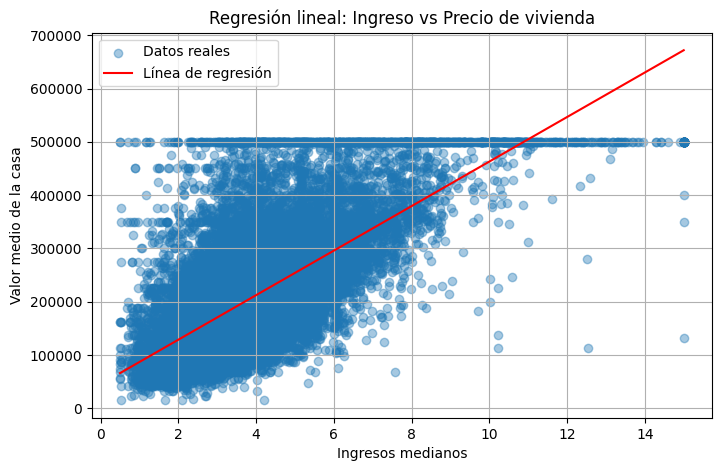

In [30]:
import matplotlib.pyplot as plt

x_pred = np.linspace(min(x), max(x), 100)
y_pred = pendiente * x_pred + interseccion

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.4, label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Ingresos medianos')
plt.ylabel('Valor medio de la casa')
plt.title('Regresión lineal: Ingreso vs Precio de vivienda')
plt.legend()
plt.grid(True)
plt.show()

Importa Seaborn

In [29]:
import seaborn as sns

Pon el estilo como Whitegrid

In [31]:
sns.set_style("whitegrid")

Arma una regplot de sns

<Axes: xlabel='median_income', ylabel='median_house_value'>

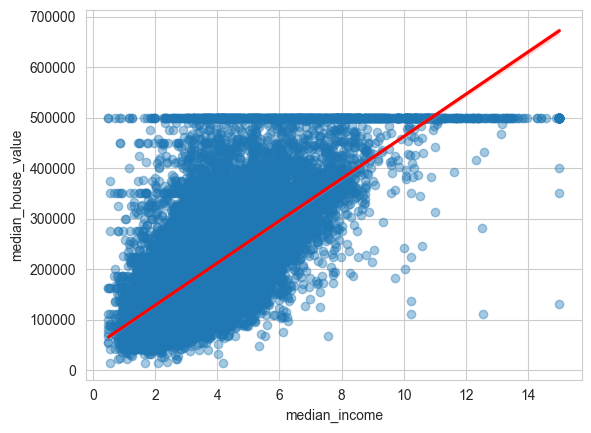

In [32]:
sns.regplot(
    x='median_income',
    y='median_house_value',
    data=df,
    line_kws={"color": "red"},   
    scatter_kws={"alpha": 0.4})